In [1]:
# Initial imports
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn import tree

import modeling_functions

In [2]:
Xs =[]
ys = []
Xs_test = []
ys_test=[]

cmlabel = []


all_features= ['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension','heart_disease', 
                   'ever_married', 'work_type', 'Residence_type', 'smoking_status']

medical_features=['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension','heart_disease'
                  , 'smoking_status']



root_path="Resources/"


In [3]:
# Loading  Actual data Scaled

file_path = Path(root_path+"y_train_actual_balanced_scaled_train_dataset.csv")
y_train_scaled = pd.read_csv(file_path)
ys.append(y_train_scaled.values.ravel())

file_path = Path(root_path+"X_train_actual_balanced_scaled_train_dataset.csv")
X_train_scaled = pd.read_csv(file_path)
Xs.append(X_train_scaled)

cmlabel.append("Using Actual Scaled data")


file_path = Path(root_path+"y_test_actual_balanced_scaled_train_dataset.csv")
y_test_scaled = pd.read_csv(file_path)
ys_test.append(y_test_scaled.values.ravel())

file_path = Path(root_path+"X_test_actual_balanced_scaled_train_dataset.csv")
X_test_scaled = pd.read_csv(file_path)
Xs_test.append(X_test_scaled)

# Loading  Actual data Unscaled

file_path = Path(root_path+"y_train_actual_balanced_unscaled_train_dataset.csv")
y_train_unscaled = pd.read_csv(file_path)
ys.append(y_train_unscaled.values.ravel())

file_path = Path(root_path+"X_train_actual_balanced_unscaled_train_dataset.csv")
X_train_unscaled = pd.read_csv(file_path)
Xs.append(X_train_unscaled)

cmlabel.append("Using Actual UnScaled data")

file_path = Path(root_path+"y_test_actual_balanced_unscaled_train_dataset.csv")
y_test_unscaled = pd.read_csv(file_path)
ys_test.append(y_test_unscaled.values.ravel())

file_path = Path(root_path+"X_test_actual_balanced_unscaled_train_dataset.csv")
X_test_unscaled = pd.read_csv(file_path)
Xs_test.append(X_test_unscaled)

# Loading  SMOTEEN data Scaled

file_path = Path(root_path+"y_train_SMOTEENN_balanced_scaled_train_dataset.csv")
y_train_scaled = pd.read_csv(file_path)
ys.append(y_train_scaled.values.ravel())

file_path = Path(root_path+"X_train_SMOTEENN_balanced_scaled_train_dataset.csv")
X_train_scaled = pd.read_csv(file_path)
Xs.append(X_train_scaled)

cmlabel.append("Using SMOTEEN Scaled data")


file_path = Path(root_path+"y_test_SMOTEENN_balanced_scaled_train_dataset.csv")
y_test_scaled = pd.read_csv(file_path)
ys_test.append(y_test_scaled.values.ravel())

file_path = Path(root_path+"X_test_SMOTEENN_balanced_scaled_train_dataset.csv")
X_test_scaled = pd.read_csv(file_path)
Xs_test.append(X_test_scaled)


In [4]:
def train_test_trees(X_train, y_train, X_test, y_test, label):
    # Creating the decision tree classifier instance
    tree_model = tree.DecisionTreeClassifier(criterion="gini")
    # Fitting the model
    tree_model = tree_model.fit(X_train, y_train)
    # Making predictions using the testing data
    predictions = tree_model.predict(X_test)
    
    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    cm_df = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
    )

    # Calculating the accuracy score
    acc_score = accuracy_score(y_test, predictions)
    
    # Displaying results
    print("Decision Tree")
    print(f"Confusion Matrix:{label}")
    display(cm_df)
    print(f"Accuracy Score : {acc_score}")
    print("Classification Report")
    print(classification_report(y_test, predictions))
    
    #Generate ROC curve
    
    gen_roc_curve(X_test, y_test, tree_model, label)
    
    return tree_model


In [5]:
def train_test_svm(X_train, y_train, X_test, y_test, label):
    # Create the SVM model
    svm = SVC(kernel='linear', probability=True)
    # Train the model
    svm.fit(X_train, y_train)
    # Evaluate the model
    predictions = svm.predict(X_test)

    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    cm_df = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
    )

    # Calculating the accuracy score
    acc_score = accuracy_score(y_test, predictions)
    
    # Displaying results
    print("SVM-Support Vector Machine")
    print(f"Confusion Matrix:{label}")
    display(cm_df)
    print(f"Accuracy Score : {acc_score}")
    print("Classification Report")
    print(classification_report(y_test, predictions))
    
    gen_roc_curve(X_test, y_test, svm, label)
    
    return svm

In [6]:
def train_test_bagging(X_train, y_train, X_test, y_test, label):
    
    classifier = BaggingClassifier(base_estimator=SVC(), n_estimators=10)

    classifier.fit(X_train, y_train)
    # Evaluate the model
    predictions = classifier.predict(X_test)

    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    cm_df = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
    )

    # Calculating the accuracy score
    acc_score = accuracy_score(y_test, predictions)
    
    # Displaying results
    print(f"Bagging - Boostrap Aggregation")
    print(f"Confusion Matrix:{label}")
    display(cm_df)
    print(f"Accuracy Score : {acc_score}")
    print("Classification Report")
    print(classification_report(y_test, predictions))
    
    gen_roc_curve(X_test, y_test, classifier, label)
    
    return classifier

In [7]:
def train_test_adaboosting(X_train, y_train, X_test, y_test, label):
    
    classifier = AdaBoostClassifier(n_estimators=100)

    classifier.fit(X_train, y_train)
    # Evaluate the model
    predictions = classifier.predict(X_test)

    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    cm_df = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
    )

    # Calculating the accuracy score
    acc_score = accuracy_score(y_test, predictions)
    
    # Displaying results
    print(f"Adaptative Boosting")
    print(f"Confusion Matrix:{label}")
    display(cm_df)
    print(f"Accuracy Score : {acc_score}")
    print("Classification Report")
    print(classification_report(y_test, predictions))
    
    gen_roc_curve(X_test, y_test, classifier, label)
    
    return classifier

In [8]:
def train_test_boosting(X_train, y_train, X_test, y_test, label, learning_rate):
    classifier = GradientBoostingClassifier(n_estimators=200,
                                            learning_rate=learning_rate, max_features=5, 
                                            max_depth=3)
    classifier.fit(X_train, y_train)
    # Evaluate the model
    predictions = classifier.predict(X_test)

    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    cm_df = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
    )

    # Calculating the accuracy score
    acc_score = accuracy_score(y_test, predictions)
    
    # Displaying results
    print(f"Gradient Boosting - learning: {learning_rate}")
    print(f"Confusion Matrix:{label}")
    display(cm_df)
    print(f"Accuracy Score : {acc_score}")
    print("Classification Report")
    print(classification_report(y_test, predictions))
    
    gen_roc_curve(X_test, y_test, classifier, label)
    
    return classifier

In [9]:
def train_test_assess_boosting_learning(X_train, y_train, X_test, y_test, print_assess=False):
    accuracy=[]
    learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
    for learning_rate in learning_rates:
        classifier = GradientBoostingClassifier(n_estimators=200,
        learning_rate=learning_rate,
        max_features=5,
        max_depth=3)
        classifier.fit(X_train, y_train)
        accuracy.append(classifier.score(X_test,y_test))
        if(print_assess):
            #print assessment
            print("Learning rate: ", learning_rate)
            print("Accuracy score (training): {0:.3f}".format(classifier.score(X_train, y_train)))
            print("Accuracy score (testing): {0:.3f}".format(classifier.score(X_test,y_test)))
    return learning_rates[accuracy.index(max(accuracy))]

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def gen_roc_curve(X_test, y_test, model, model_lbl):
    
    ns_probs = [0 for _ in range(len(y_test))]
    lr_probs = model.predict_proba(X_test)
    lr_probs = lr_probs[:, 1]
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)

    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=model_lbl)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    # y_scores = rf.predict_proba(X_train_smote)[:,1]
    # precisions, recalls, thresholds = precision_recall_curve(y_train_smote, y_scores)
    print(f"Area under curve: {lr_auc}\n")

Decision Tree
Confusion Matrix:Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,33,9
Actual 1,12,30


Accuracy Score : 0.75
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        42
           1       0.77      0.71      0.74        42

    accuracy                           0.75        84
   macro avg       0.75      0.75      0.75        84
weighted avg       0.75      0.75      0.75        84



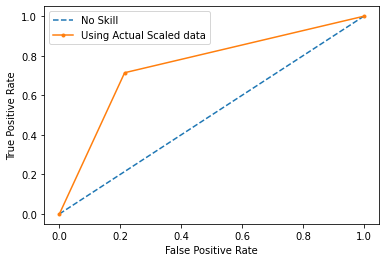

Area under curve: 0.7500000000000001

SVM-Support Vector Machine
Confusion Matrix:Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,33,9
Actual 1,7,35


Accuracy Score : 0.8095238095238095
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.80      0.83      0.81        42

    accuracy                           0.81        84
   macro avg       0.81      0.81      0.81        84
weighted avg       0.81      0.81      0.81        84



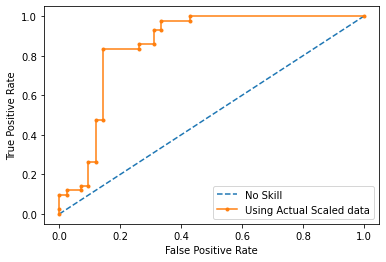

Area under curve: 0.8554421768707483

Bagging - Boostrap Aggregation
Confusion Matrix:Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,34,8
Actual 1,6,36


Accuracy Score : 0.8333333333333334
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        42
           1       0.82      0.86      0.84        42

    accuracy                           0.83        84
   macro avg       0.83      0.83      0.83        84
weighted avg       0.83      0.83      0.83        84



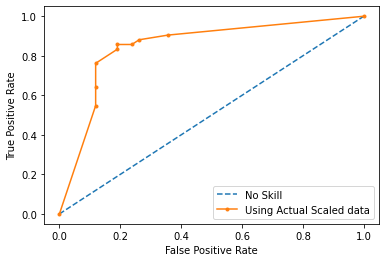

Area under curve: 0.8483560090702947

Adaptative Boosting
Confusion Matrix:Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,32,10
Actual 1,12,30


Accuracy Score : 0.7380952380952381
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        42
           1       0.75      0.71      0.73        42

    accuracy                           0.74        84
   macro avg       0.74      0.74      0.74        84
weighted avg       0.74      0.74      0.74        84



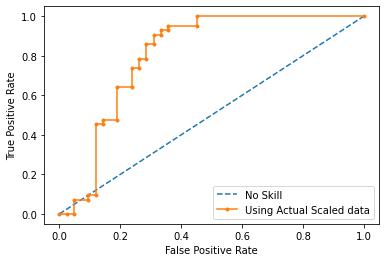

Area under curve: 0.808390022675737

Gradient Boosting - learning: 0.05
Confusion Matrix:Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,36,6
Actual 1,6,36


Accuracy Score : 0.8571428571428571
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        42
           1       0.86      0.86      0.86        42

    accuracy                           0.86        84
   macro avg       0.86      0.86      0.86        84
weighted avg       0.86      0.86      0.86        84



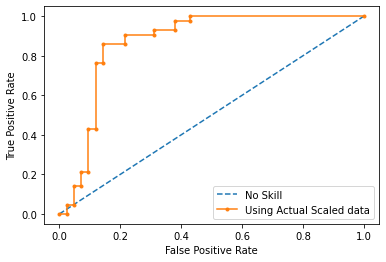

Area under curve: 0.8696145124716552

Decision Tree
Confusion Matrix:Using Actual UnScaled data


,Predicted 0,Predicted 1
Actual 0,32,10
Actual 1,14,28


Accuracy Score : 0.7142857142857143
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.76      0.73        42
           1       0.74      0.67      0.70        42

    accuracy                           0.71        84
   macro avg       0.72      0.71      0.71        84
weighted avg       0.72      0.71      0.71        84



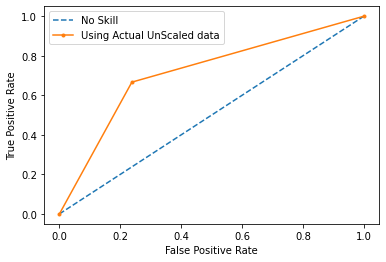

Area under curve: 0.7142857142857142

SVM-Support Vector Machine
Confusion Matrix:Using Actual UnScaled data


,Predicted 0,Predicted 1
Actual 0,33,9
Actual 1,6,36


Accuracy Score : 0.8214285714285714
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        42
           1       0.80      0.86      0.83        42

    accuracy                           0.82        84
   macro avg       0.82      0.82      0.82        84
weighted avg       0.82      0.82      0.82        84



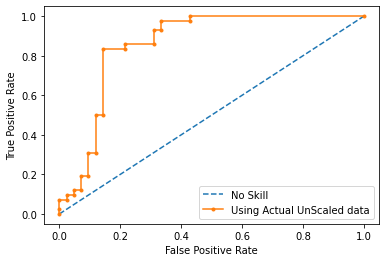

Area under curve: 0.8582766439909297

Bagging - Boostrap Aggregation
Confusion Matrix:Using Actual UnScaled data


,Predicted 0,Predicted 1
Actual 0,32,10
Actual 1,7,35


Accuracy Score : 0.7976190476190477
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        42
           1       0.78      0.83      0.80        42

    accuracy                           0.80        84
   macro avg       0.80      0.80      0.80        84
weighted avg       0.80      0.80      0.80        84



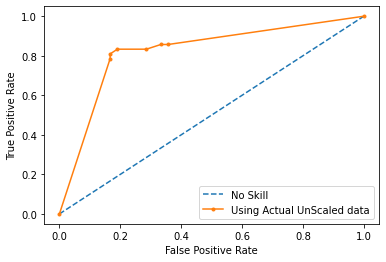

Area under curve: 0.8219954648526077

Adaptative Boosting
Confusion Matrix:Using Actual UnScaled data


,Predicted 0,Predicted 1
Actual 0,32,10
Actual 1,12,30


Accuracy Score : 0.7380952380952381
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        42
           1       0.75      0.71      0.73        42

    accuracy                           0.74        84
   macro avg       0.74      0.74      0.74        84
weighted avg       0.74      0.74      0.74        84



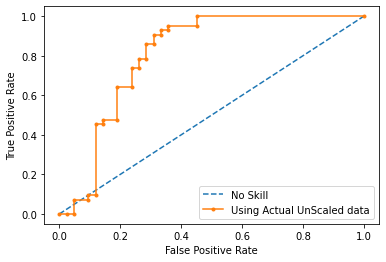

Area under curve: 0.808390022675737

Gradient Boosting - learning: 0.05
Confusion Matrix:Using Actual UnScaled data


,Predicted 0,Predicted 1
Actual 0,36,6
Actual 1,9,33


Accuracy Score : 0.8214285714285714
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        42
           1       0.85      0.79      0.81        42

    accuracy                           0.82        84
   macro avg       0.82      0.82      0.82        84
weighted avg       0.82      0.82      0.82        84



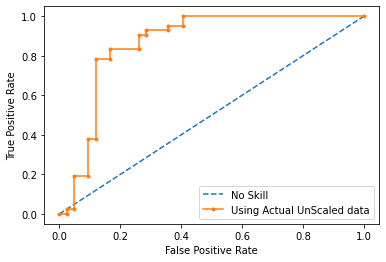

Area under curve: 0.8639455782312926

Decision Tree
Confusion Matrix:Using SMOTEEN Scaled data


,Predicted 0,Predicted 1
Actual 0,824,100
Actual 1,25,17


Accuracy Score : 0.870600414078675
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       924
           1       0.15      0.40      0.21        42

    accuracy                           0.87       966
   macro avg       0.56      0.65      0.57       966
weighted avg       0.93      0.87      0.90       966



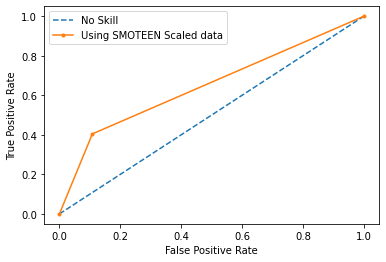

Area under curve: 0.6482683982683982

SVM-Support Vector Machine
Confusion Matrix:Using SMOTEEN Scaled data


,Predicted 0,Predicted 1
Actual 0,647,277
Actual 1,4,38


Accuracy Score : 0.7091097308488613
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       924
           1       0.12      0.90      0.21        42

    accuracy                           0.71       966
   macro avg       0.56      0.80      0.52       966
weighted avg       0.96      0.71      0.80       966



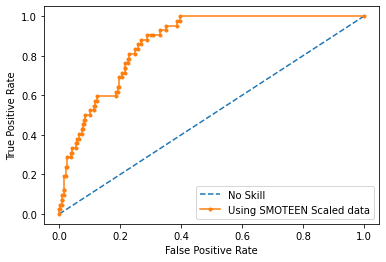

Area under curve: 0.8667027417027416

Bagging - Boostrap Aggregation
Confusion Matrix:Using SMOTEEN Scaled data


,Predicted 0,Predicted 1
Actual 0,695,229
Actual 1,19,23


Accuracy Score : 0.7432712215320911
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.75      0.85       924
           1       0.09      0.55      0.16        42

    accuracy                           0.74       966
   macro avg       0.53      0.65      0.50       966
weighted avg       0.94      0.74      0.82       966



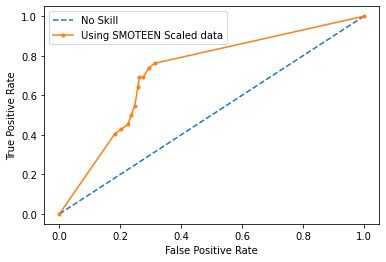

Area under curve: 0.7175582354153782

Adaptative Boosting
Confusion Matrix:Using SMOTEEN Scaled data


,Predicted 0,Predicted 1
Actual 0,791,133
Actual 1,14,28


Accuracy Score : 0.8478260869565217
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.86      0.91       924
           1       0.17      0.67      0.28        42

    accuracy                           0.85       966
   macro avg       0.58      0.76      0.60       966
weighted avg       0.95      0.85      0.89       966



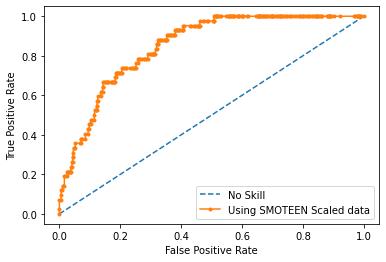

Area under curve: 0.8509327973613687

Gradient Boosting - learning: 0.5
Confusion Matrix:Using SMOTEEN Scaled data


,Predicted 0,Predicted 1
Actual 0,849,75
Actual 1,29,13


Accuracy Score : 0.8923395445134575
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       924
           1       0.15      0.31      0.20        42

    accuracy                           0.89       966
   macro avg       0.56      0.61      0.57       966
weighted avg       0.93      0.89      0.91       966



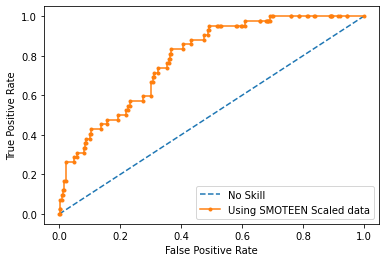

Area under curve: 0.7852762317048031



In [11]:
for i, _ in enumerate(ys):
    X_train = Xs[i][all_features]
    y_train= ys[i]
    X_test = Xs_test[i][all_features]
    y_test= ys_test[i]
    label= cmlabel[i]
    boost_learn=train_test_assess_boosting_learning(X_train, y_train, X_test, y_test)
    train_test_trees(X_train, y_train, X_test, y_test, label)
    train_test_svm(X_train, y_train, X_test, y_test, label)
    train_test_bagging(X_train, y_train, X_test, y_test, label)
    train_test_adaboosting(X_train, y_train, X_test, y_test, label)
    train_test_boosting(X_train, y_train, X_test, y_test, label, boost_learn)

Decision Tree
Confusion Matrix:Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,35,7
Actual 1,13,29


Accuracy Score : 0.7619047619047619
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        42
           1       0.81      0.69      0.74        42

    accuracy                           0.76        84
   macro avg       0.77      0.76      0.76        84
weighted avg       0.77      0.76      0.76        84



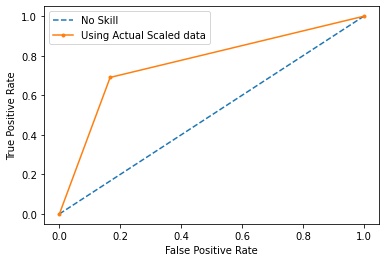

Area under curve: 0.761904761904762

SVM-Support Vector Machine
Confusion Matrix:Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,33,9
Actual 1,6,36


Accuracy Score : 0.8214285714285714
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        42
           1       0.80      0.86      0.83        42

    accuracy                           0.82        84
   macro avg       0.82      0.82      0.82        84
weighted avg       0.82      0.82      0.82        84



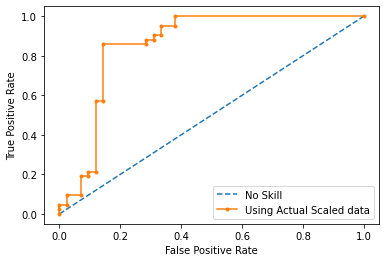

Area under curve: 0.8582766439909297

Bagging - Boostrap Aggregation
Confusion Matrix:Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,34,8
Actual 1,6,36


Accuracy Score : 0.8333333333333334
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        42
           1       0.82      0.86      0.84        42

    accuracy                           0.83        84
   macro avg       0.83      0.83      0.83        84
weighted avg       0.83      0.83      0.83        84



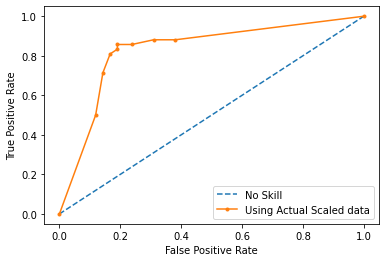

Area under curve: 0.8299319727891156

Adaptative Boosting
Confusion Matrix:Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,32,10
Actual 1,13,29


Accuracy Score : 0.7261904761904762
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.76      0.74        42
           1       0.74      0.69      0.72        42

    accuracy                           0.73        84
   macro avg       0.73      0.73      0.73        84
weighted avg       0.73      0.73      0.73        84



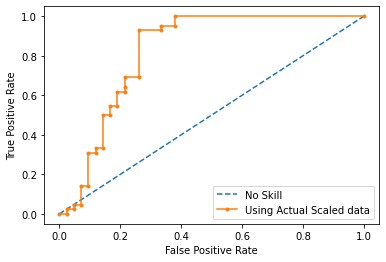

Area under curve: 0.8236961451247166

Gradient Boosting - learning: 0.05
Confusion Matrix:Using Actual Scaled data


,Predicted 0,Predicted 1
Actual 0,34,8
Actual 1,11,31


Accuracy Score : 0.7738095238095238
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        42
           1       0.79      0.74      0.77        42

    accuracy                           0.77        84
   macro avg       0.78      0.77      0.77        84
weighted avg       0.78      0.77      0.77        84



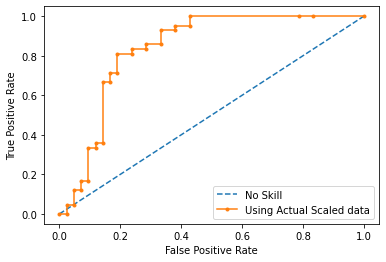

Area under curve: 0.8373015873015873

Decision Tree
Confusion Matrix:Using Actual UnScaled data


,Predicted 0,Predicted 1
Actual 0,35,7
Actual 1,15,27


Accuracy Score : 0.7380952380952381
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        42
           1       0.79      0.64      0.71        42

    accuracy                           0.74        84
   macro avg       0.75      0.74      0.74        84
weighted avg       0.75      0.74      0.74        84



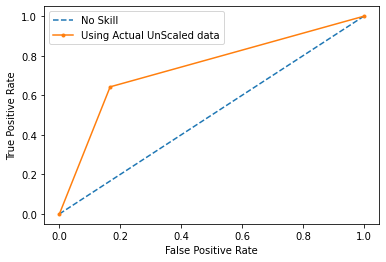

Area under curve: 0.7380952380952381

SVM-Support Vector Machine
Confusion Matrix:Using Actual UnScaled data


,Predicted 0,Predicted 1
Actual 0,33,9
Actual 1,6,36


Accuracy Score : 0.8214285714285714
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        42
           1       0.80      0.86      0.83        42

    accuracy                           0.82        84
   macro avg       0.82      0.82      0.82        84
weighted avg       0.82      0.82      0.82        84



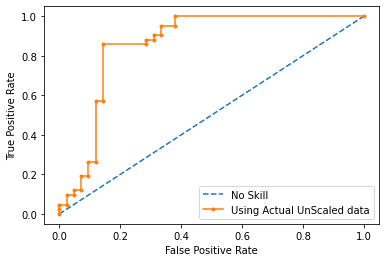

Area under curve: 0.8599773242630385

Bagging - Boostrap Aggregation
Confusion Matrix:Using Actual UnScaled data


,Predicted 0,Predicted 1
Actual 0,34,8
Actual 1,7,35


Accuracy Score : 0.8214285714285714
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.81      0.83      0.82        42

    accuracy                           0.82        84
   macro avg       0.82      0.82      0.82        84
weighted avg       0.82      0.82      0.82        84



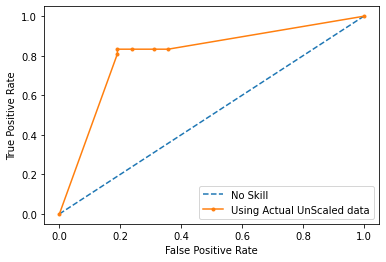

Area under curve: 0.8052721088435375

Adaptative Boosting
Confusion Matrix:Using Actual UnScaled data


,Predicted 0,Predicted 1
Actual 0,32,10
Actual 1,13,29


Accuracy Score : 0.7261904761904762
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.76      0.74        42
           1       0.74      0.69      0.72        42

    accuracy                           0.73        84
   macro avg       0.73      0.73      0.73        84
weighted avg       0.73      0.73      0.73        84



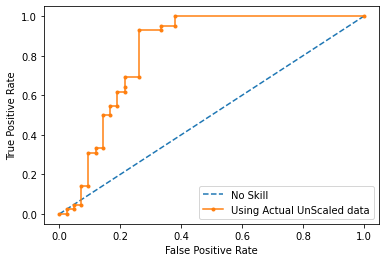

Area under curve: 0.8236961451247166

Gradient Boosting - learning: 0.05
Confusion Matrix:Using Actual UnScaled data


,Predicted 0,Predicted 1
Actual 0,35,7
Actual 1,10,32


Accuracy Score : 0.7976190476190477
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.83      0.80        42
           1       0.82      0.76      0.79        42

    accuracy                           0.80        84
   macro avg       0.80      0.80      0.80        84
weighted avg       0.80      0.80      0.80        84



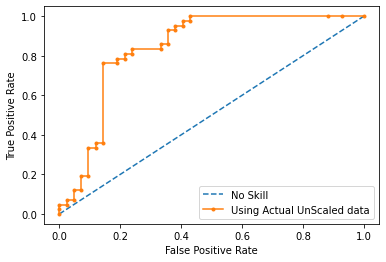

Area under curve: 0.8401360544217688

Decision Tree
Confusion Matrix:Using SMOTEEN Scaled data


,Predicted 0,Predicted 1
Actual 0,815,109
Actual 1,23,19


Accuracy Score : 0.8633540372670807
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.88      0.93       924
           1       0.15      0.45      0.22        42

    accuracy                           0.86       966
   macro avg       0.56      0.67      0.57       966
weighted avg       0.94      0.86      0.89       966



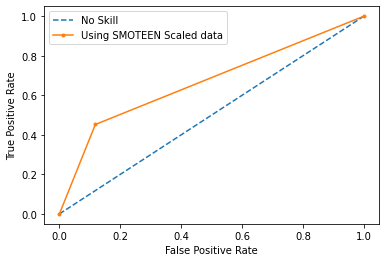

Area under curve: 0.6672077922077921

SVM-Support Vector Machine
Confusion Matrix:Using SMOTEEN Scaled data


,Predicted 0,Predicted 1
Actual 0,638,286
Actual 1,4,38


Accuracy Score : 0.6997929606625258
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.69      0.81       924
           1       0.12      0.90      0.21        42

    accuracy                           0.70       966
   macro avg       0.56      0.80      0.51       966
weighted avg       0.96      0.70      0.79       966



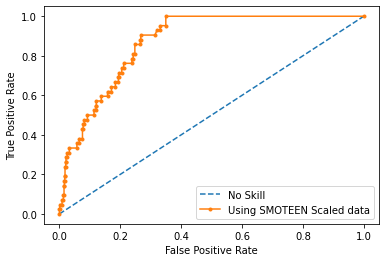

Area under curve: 0.8710317460317459

Bagging - Boostrap Aggregation
Confusion Matrix:Using SMOTEEN Scaled data


,Predicted 0,Predicted 1
Actual 0,671,253
Actual 1,11,31


Accuracy Score : 0.7267080745341615
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.73      0.84       924
           1       0.11      0.74      0.19        42

    accuracy                           0.73       966
   macro avg       0.55      0.73      0.51       966
weighted avg       0.95      0.73      0.81       966



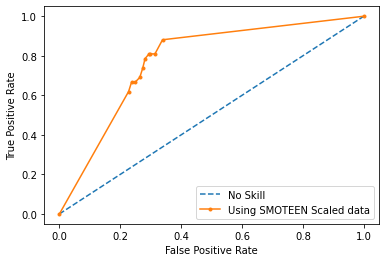

Area under curve: 0.7766182230467944

Adaptative Boosting
Confusion Matrix:Using SMOTEEN Scaled data


,Predicted 0,Predicted 1
Actual 0,738,186
Actual 1,11,31


Accuracy Score : 0.7960662525879917
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.80      0.88       924
           1       0.14      0.74      0.24        42

    accuracy                           0.80       966
   macro avg       0.56      0.77      0.56       966
weighted avg       0.95      0.80      0.85       966



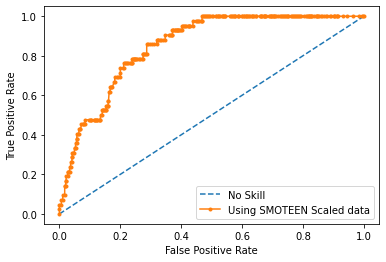

Area under curve: 0.8524273345701918

Gradient Boosting - learning: 0.5
Confusion Matrix:Using SMOTEEN Scaled data


,Predicted 0,Predicted 1
Actual 0,846,78
Actual 1,24,18


Accuracy Score : 0.8944099378881988
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       924
           1       0.19      0.43      0.26        42

    accuracy                           0.89       966
   macro avg       0.58      0.67      0.60       966
weighted avg       0.94      0.89      0.91       966



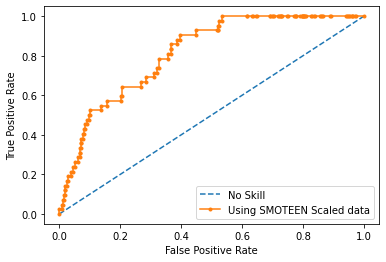

Area under curve: 0.8148835291692436



In [12]:
for i, _ in enumerate(ys):
    X_train = Xs[i][medical_features]
    y_train= ys[i]
    X_test = Xs_test[i][medical_features]
    y_test= ys_test[i]
    label= cmlabel[i]
    boost_learn=train_test_assess_boosting_learning(X_train, y_train, X_test, y_test)
    train_test_trees(X_train, y_train, X_test, y_test, label)
    train_test_svm(X_train, y_train, X_test, y_test, label)
    train_test_bagging(X_train, y_train, X_test, y_test, label)
    train_test_adaboosting(X_train, y_train, X_test, y_test, label)
    train_test_boosting(X_train, y_train, X_test, y_test, label, boost_learn)

In [13]:
Xs[0][medical_features].head()

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,smoking_status
0,1.054871,0.261246,-0.893721,1.193046,-0.488678,-0.343286,-0.588710
1,0.657670,-0.261658,0.768508,-0.838191,-0.488678,-0.343286,0.413607
2,-0.578070,-0.471103,-0.728995,-0.838191,-0.488678,-0.343286,1.415924
3,0.083933,0.776694,-0.339645,-0.838191,-0.488678,-0.343286,-1.591027
4,-1.857942,-0.749239,-1.357947,1.193046,-0.488678,-0.343286,0.413607


In [14]:
Xs[0][all_features].head()

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
0,1.054871,0.261246,-0.893721,1.193046,-0.488678,-0.343286,0.535557,0.911077,0.947176,-0.588710
1,0.657670,-0.261658,0.768508,-0.838191,-0.488678,-0.343286,0.535557,-0.117758,-1.055770,0.413607
2,-0.578070,-0.471103,-0.728995,-0.838191,-0.488678,-0.343286,0.535557,-2.175429,0.947176,1.415924
3,0.083933,0.776694,-0.339645,-0.838191,-0.488678,-0.343286,0.535557,-2.175429,-1.055770,-1.591027
4,-1.857942,-0.749239,-1.357947,1.193046,-0.488678,-0.343286,-1.867214,1.939913,0.947176,0.413607
